# DOG BREED RECOGNITION
<br>

@author: Juarez Monteiro

---
## Análise dos dados fornecidos


### Objetivo deste notebook:

- Verificar inconsistência nos dados
- Verificar a distribuição do dataset
- Visualizar os dados fornecidos

---

### Atenção!

Antes de executar esse notebook, é interessante realizar um backup dos dados, uma vez que este notebook irá alterar alguns dados da pasta `train`.

---

Após a análise realizada neste notebook, foi visto que o dataset para o primeiro problema proposto contém **100** classes distintas. Também foi visto que existiam algumas imagens completamentas escuras no dataset.


Dado esse fato, foi criado um código para encontrar e remover todas essas imagens totalmente escuras, e com isso foram encontradas/removidas **248 imagens**, deixando o dataset com a quantidade atual de **17097 imagens**.

Após isso, foi utilizada a biblitoeca Pandas para fosse criado um DataFrame das imagens/rótulos do problema. Com o DataFrame criado, foi possível utilizar o método `.describe`, o qual possui várias informações relevantes para extrairmos do nossos dados, tais como: *mean*, *std*, *max*, *min*, e a distribuição dos nossos dados.

Por fim, conseguimos analisar a diferença entre as classes com menos imagens e as que possuem mais. A classe com menos imagens é chamada de **Pekinese**, possuindo um total de **149 imagens**, já a classe que possui mais imagens é a classe **Maltese_dog** com um total de  **252 imagens**.

---

In [1]:
%matplotlib inline
import os, random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [2]:
train_path = './../data/dogs/train'

In [3]:
'''
Here I scan the train folder to find the number of images per class.
'''

dog_breed_dict = {}
folders = os.listdir(train_path)

for f in folders:
    dog_class = f.split('-')[-1]
    class_folder = os.path.join(train_path, f)
    dog_breed_dict[dog_class] = len(os.listdir(class_folder))

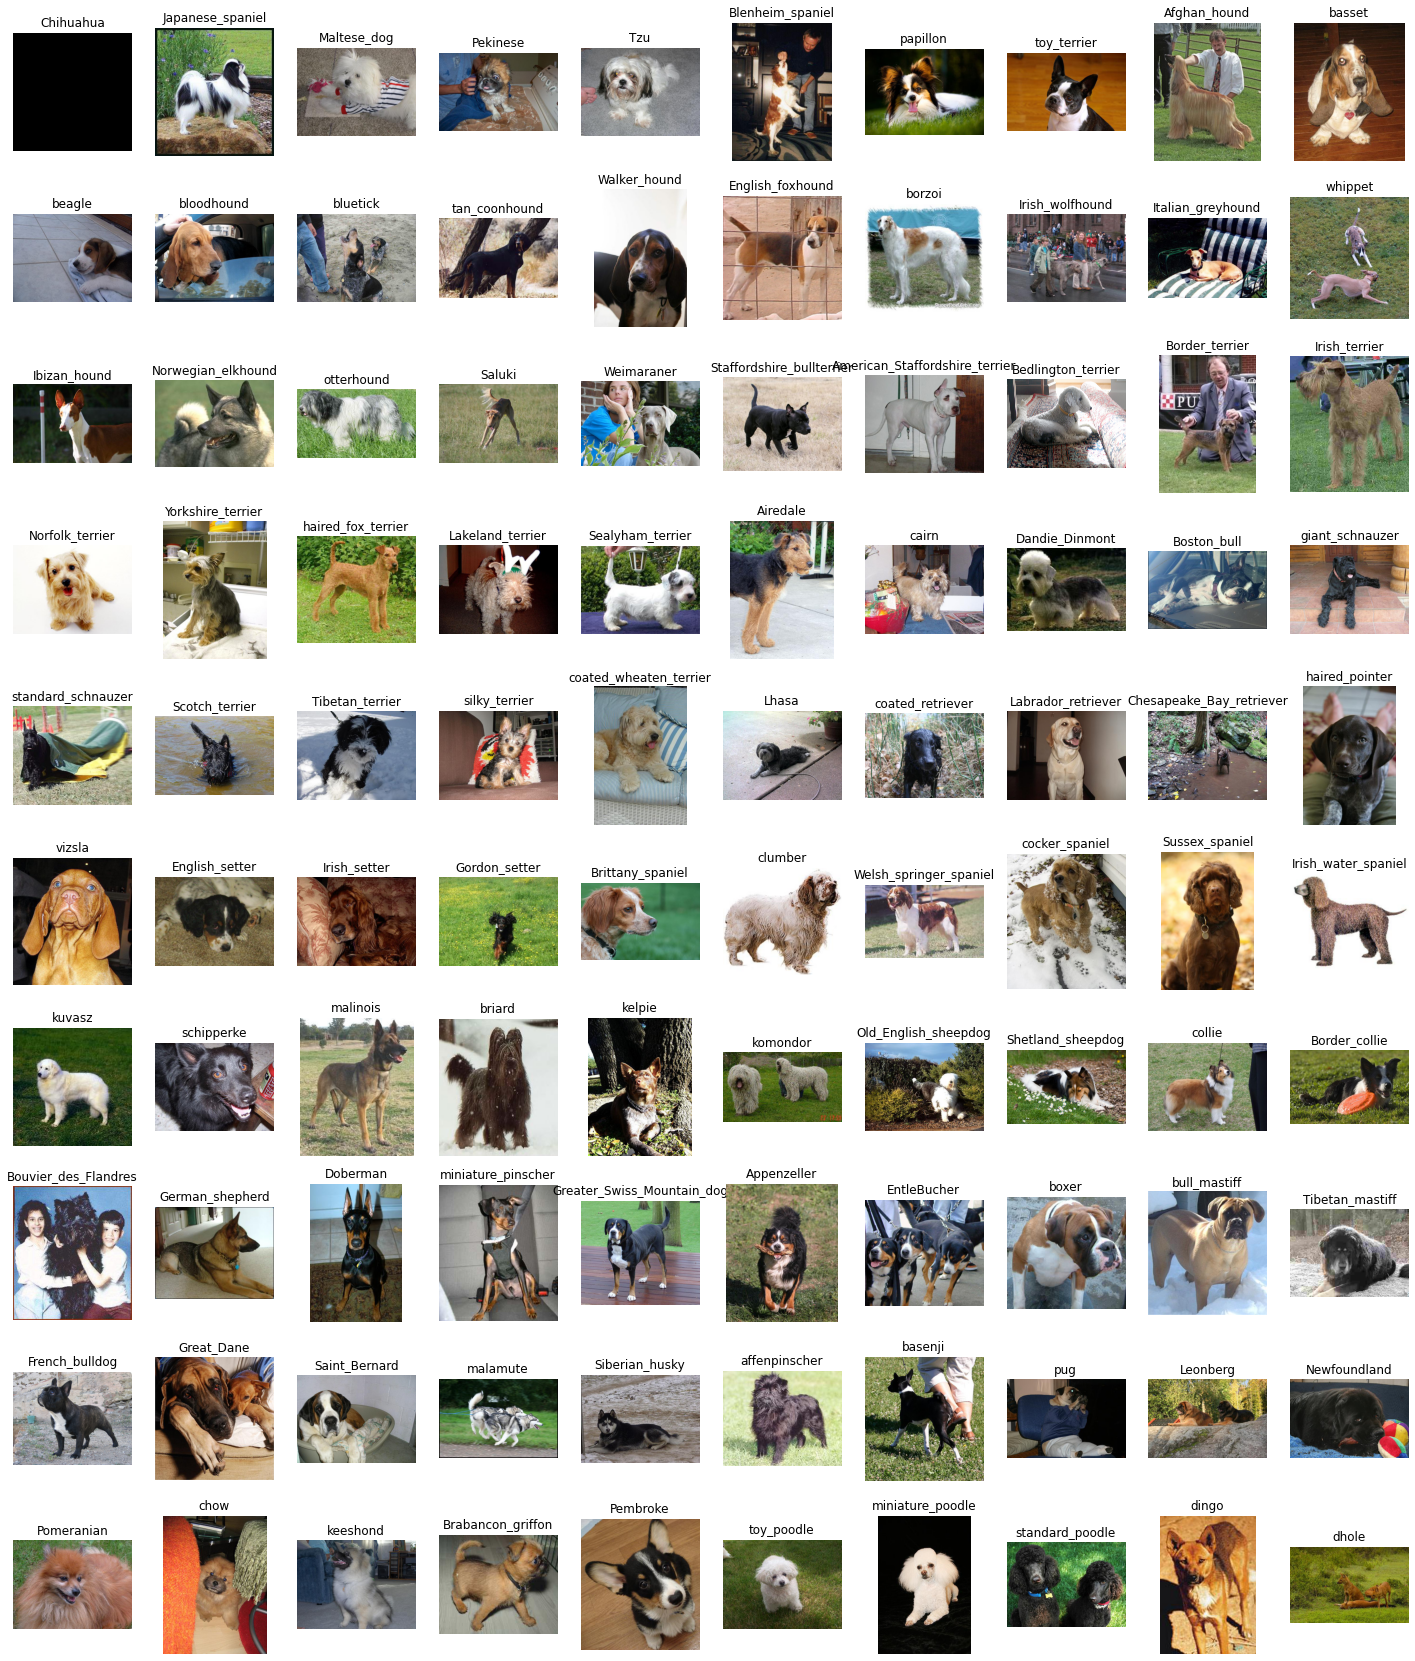

In [4]:
'''
Now I just randomly plot one image per class just to visualize the data.
It is essential to mention that I found black images spread all over the dataset due to this practice.
'''

id_list = []
fig, axes = plt.subplots(10, 10, figsize=(25, 30), facecolor='w')

i = 0
for ax in axes.ravel():
    ax.axis('off')
    class_path = os.path.join(train_path, folders[i])
    label = folders[i].split('-')[-1]
    imgs = os.listdir(class_path)
    img_chosen = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_chosen)
    img = Image.open(img_path)
    ax.set_title(label)
    ax.imshow(img)
    i+=1

In [5]:
'''
With this, I scan all folders again but now looking for full black images.
'''

black_imgs_dict = {}

with tqdm(total=100, position=0, leave=True) as pbar:
    for f in folders:
        class_path = os.path.join(train_path, f)
        dog_class = f.split('-')[-1]
        
        for img in os.listdir(class_path):
            img_path = os.path.join(class_path, img)
            img = Image.open(img_path)        
            extrema = img.convert("L").getextrema()

            if extrema == (0, 0):
                if dog_class in black_imgs_dict.keys():
                    black_imgs_dict[dog_class].append(img_path)
                else:
                    black_imgs_dict[dog_class] = [img_path]

            img.close()
        pbar.update()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:45<00:00,  1.65s/it]


In [6]:
'''
After executing the previous scan, we found 248 full black images.
'''

black_imgs = 0

for item in black_imgs_dict.items():
    black_imgs += len(item[1])

print(f'There are a total of {black_imgs} black images in the dataset.')

There are a total of 248 black images in the dataset.


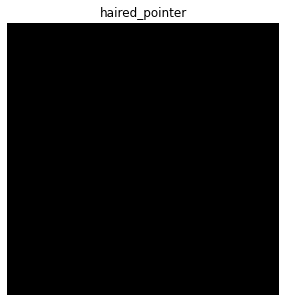

In [7]:
'''
Here I plot (randomly) the black images found (for the sake of sanity).
'''

black_imgs_keys = list(black_imgs_dict.keys())
class_chosen = random.choice(black_imgs_keys)
img_chosen = random.choice(black_imgs_dict[class_chosen])

fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor='w')
img = Image.open(img_chosen)
ax.axis('off')
ax.set_title(class_chosen)
ax.imshow(img)
img.close()

In [8]:
'''
Here I decided to transform the dictionary previous created
into a pandas data frame to quickly obtain information, such as:
std, mean, max, min, etc.
'''
dog_df = pd.DataFrame.from_dict(dog_breed_dict, orient='index')
dog_df.describe()

,0
count,100.000000
mean,173.450000
std,22.419947
min,151.000000
25%,155.000000
50%,162.000000
75%,189.000000
max,255.000000


<AxesSubplot:xlabel='0', ylabel='Count'>

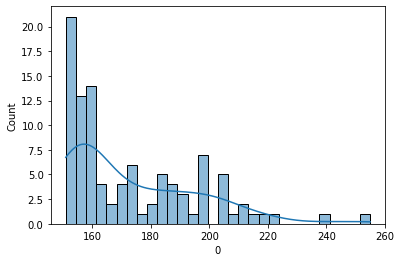

In [9]:
'''
Here, in this histogram, we can see that the dataset concentrates
over 160-200 images per class.
There are a few cases with more than 200 samples.
'''

sns.histplot(data=dog_df[0], bins=30, kde=True)

In [10]:
'''
After obtaining this information, I decided to remove the full black images
found before.

'''
i = 0
for values in black_imgs_dict.values():
    for img in values:
        if os.path.isfile(img):
            os.remove(img)
            i+=1
            
print(f'{i} image(s) removed.')

248 image(s) removed.


In [11]:
'''
After that, I scanned the dataset again to make sure that the files were removed.
(I manually created a backup of my data to avoid possible problems.)
'''

dog_breed_dict_no_black_imgs = {}
folders = os.listdir(train_path)

for f in folders:
    dog_class = f.split('-')[-1]
    class_folder = os.path.join(train_path, f)
    dog_breed_dict_no_black_imgs[dog_class] = len(os.listdir(class_folder))

In [12]:
'''
And again, I transform my dictionary above into a pandas data frame,
to quickly extract information using the method .describe()
'''

dog_no_black_imgs_df = pd.DataFrame.from_dict(dog_breed_dict_no_black_imgs, orient='index')
dog_no_black_imgs_df.describe()

,0
count,100.000000
mean,170.970000
std,22.398347
min,149.000000
25%,153.000000
50%,159.500000
75%,186.250000
max,252.000000


In [13]:
'''
Here is displayed how many images we have for the training phase.
'''
print(sum(dog_breed_dict_no_black_imgs.values()))
# print(dog_no_black_imgs_df.sum())

17097
0    17097
dtype: int64


In [14]:
'''
All classes sorted by quantity
'''

print(dog_no_black_imgs_df.sort_values(0))

                          0
Pekinese                149
dhole                   150
clumber                 150
Welsh_springer_spaniel  150
borzoi                  150
...                     ...
Tzu                     214
Irish_wolfhound         217
Pomeranian              219
Afghan_hound            239
Maltese_dog             252

[100 rows x 1 columns]
